In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data cleaning

In [129]:
df = pd.read_csv('.\\Leads.csv')
df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [130]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Checking for Null records

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [132]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### Dropping columns wich has greater than 2500 null records

In [133]:
for col in df.columns:
    if df[col].isnull().sum() > 3000:
        df.drop(col, axis=1, inplace=True)

In [134]:
df.isnull().sum()


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### Dropping insignificant columns city and country

In [135]:
df.drop(['City'], axis = 1, inplace = True)
df.drop(['Country'], axis = 1, inplace = True)

In [136]:
round(100*(df.isnull().sum()/len(df.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [137]:
for column in df:
    print(df[column].astype('category').value_counts())
    print('___________________________________________________')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


### Dropping columns in which only one value was majorly present for all the data points

In [138]:
df.drop(['Lead Profile', 'How did you hear about X Education','Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

### Handling remaing columns for Null values

In [139]:
df['What matters most to you in choosing a course'].value_counts()


What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [140]:
df.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)


In [141]:
df.isnull().sum()


Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [142]:
df = df[~pd.isnull(df['What is your current occupation'])]


In [143]:
df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [144]:
df = df[~pd.isnull(df['TotalVisits'])]


In [145]:
df.isnull().sum()


Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [146]:
df = df[~pd.isnull(df['Lead Source'])]
df = df[~pd.isnull(df['Specialization'])]


In [147]:
df.isnull().sum()


Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

### Removing insignificant columns

In [148]:
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)


In [149]:
df.shape

(6373, 12)

In [150]:
df.head(5)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


### EDA

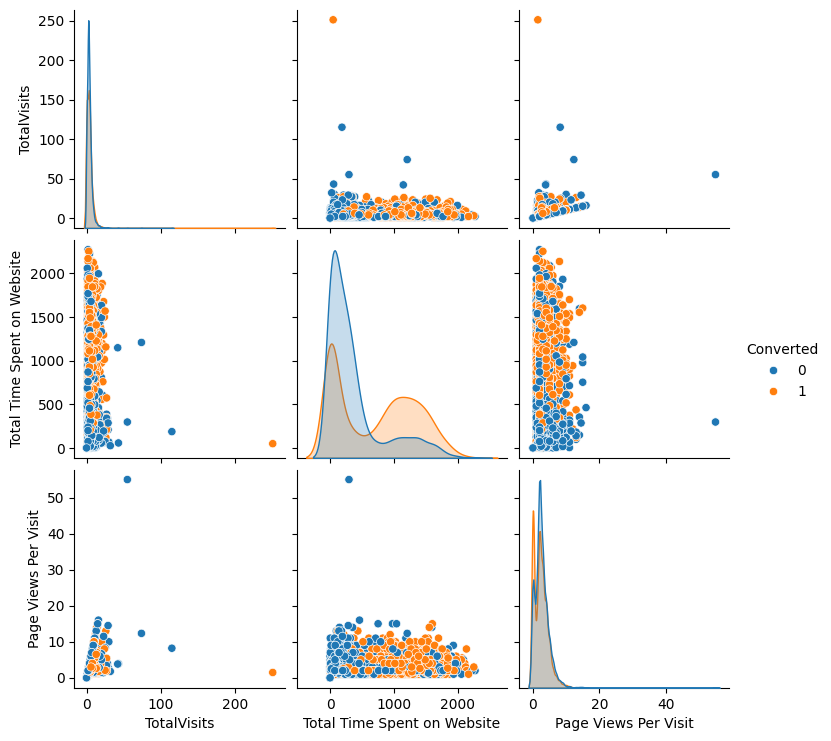

In [151]:
sns.pairplot(df,diag_kind='kde',hue='Converted')
plt.show()

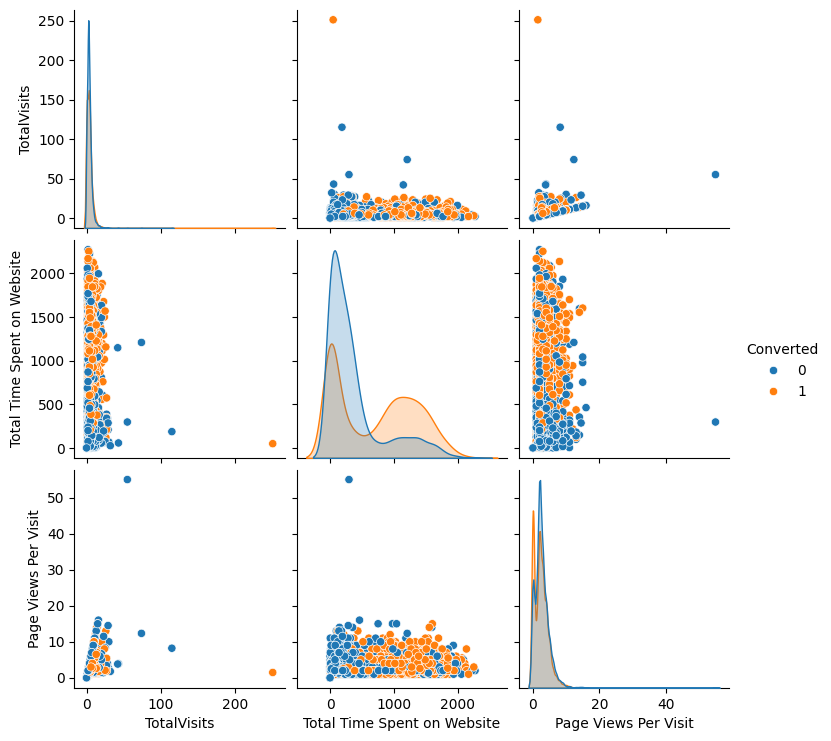

In [152]:
edu = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(edu,diag_kind='kde',hue='Converted')
plt.show()

In [153]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
tedu = pd.DataFrame(pt.fit_transform(edu))
tedu.columns = edu.columns
tedu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.539988,-1.532509,-1.534722,-0.962570
1,0.690854,0.641870,0.230818,-0.962570
2,-0.219742,1.262512,-0.019004,1.038885
3,-0.723932,0.153656,-0.629842,-0.962570
4,-0.219742,1.204175,-0.629842,1.038885


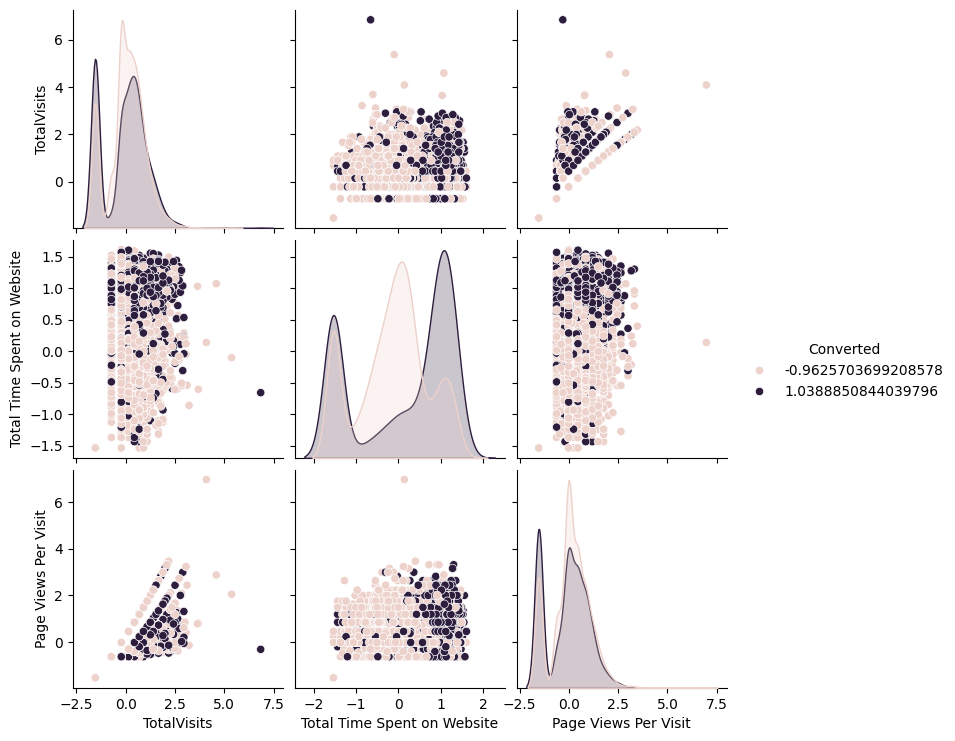

In [154]:
sns.pairplot(tedu,diag_kind='kde',hue='Converted')
plt.show()

### Categarical variables analysis

In [155]:
# Create dummy variables
temp = df.loc[:, df.dtypes == 'object']
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Adding results to master dataframe
df = pd.concat([df, dummy], axis=1)

In [156]:
dummy_spl = pd.get_dummies(df['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis=1)
df = pd.concat([df, dummy_spl], axis = 1)
df = df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)
df.head(5)


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,1,2.0,1428,1.0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


### Test Train split

In [157]:
from sklearn.model_selection import train_test_split
X = df.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,2.0,1428,1.0,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [158]:
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

In [160]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
218,0.015936,0.082306,0.250,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4171,0.023904,0.034331,0.375,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4037,0.000000,0.000000,0.000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3660,0.000000,0.000000,0.000,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Plotting corrlations

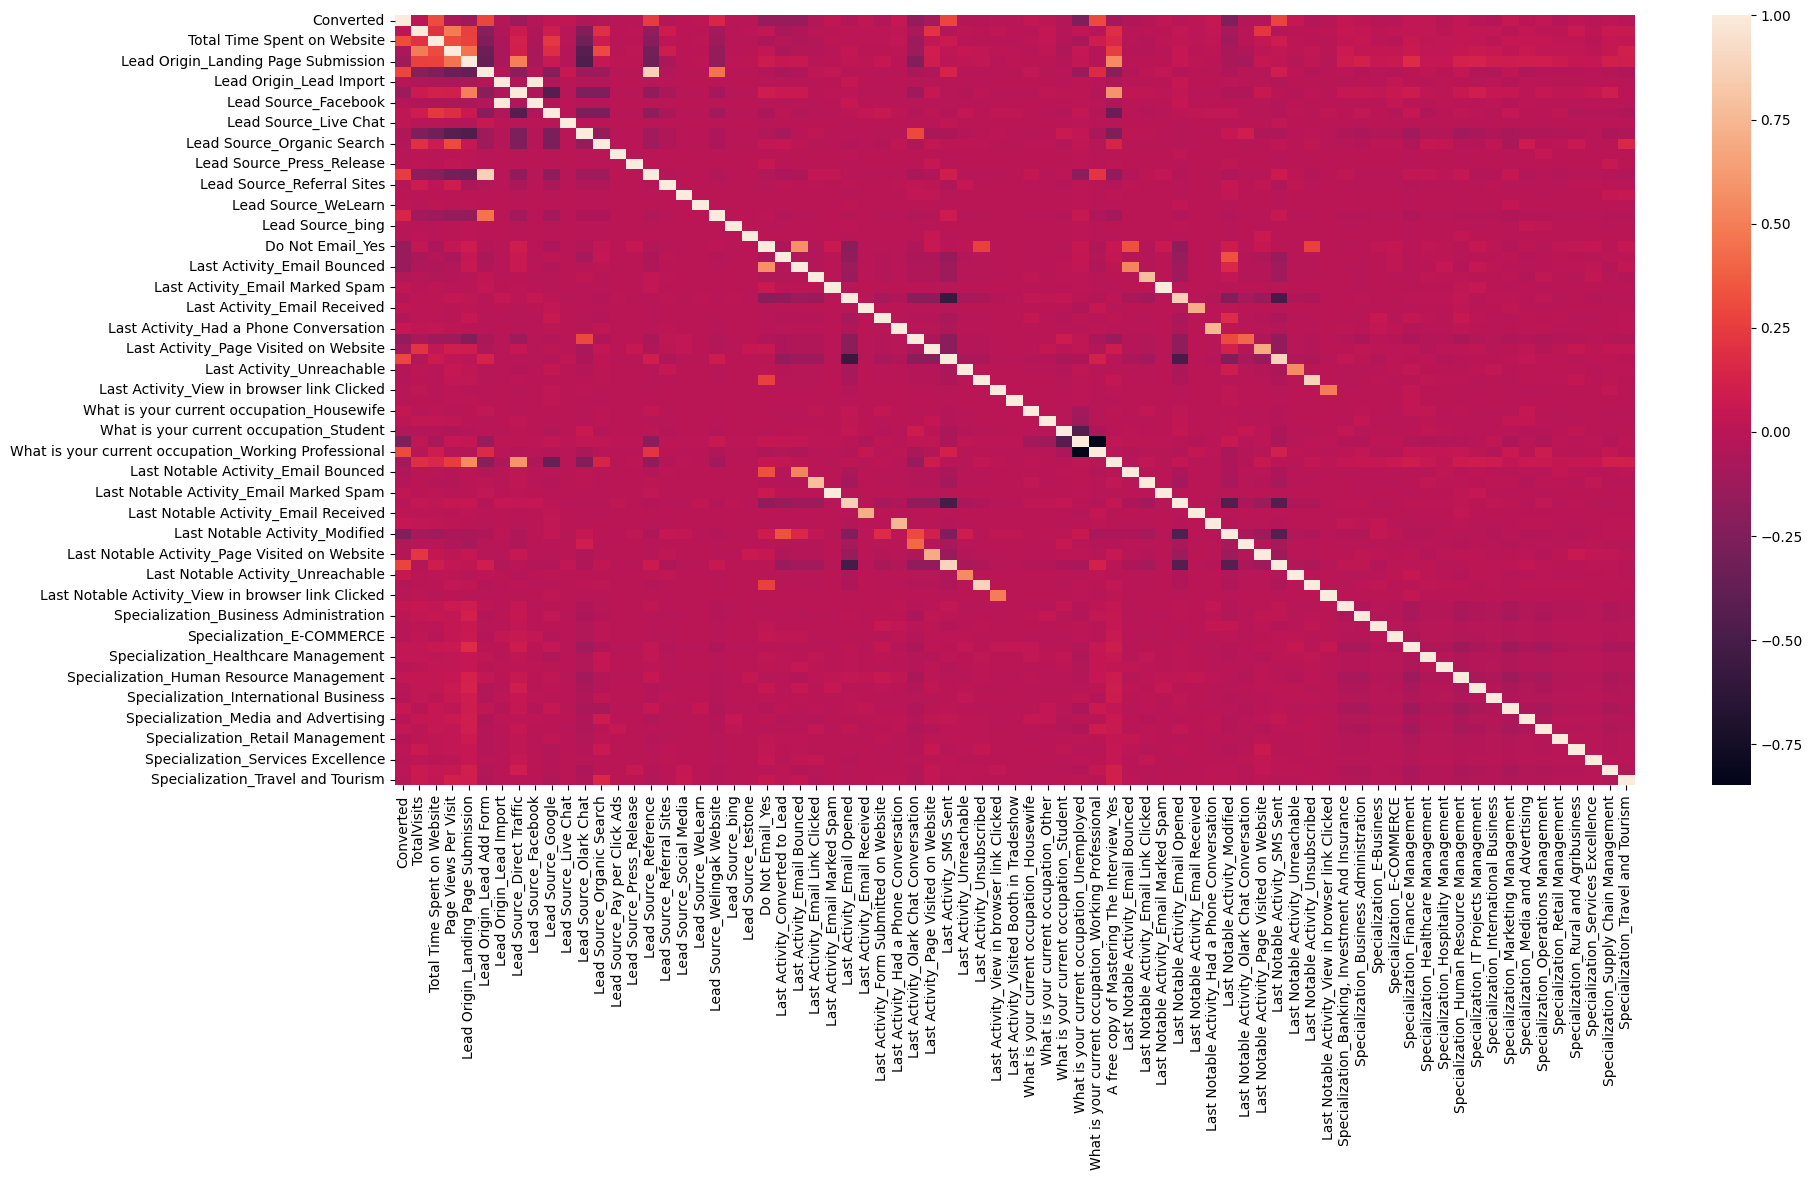

In [161]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr())
plt.show()

### Model

In [162]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, step=20)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Live Chat', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Pay per Click Ads', False, 3),
 ('Lead Source_Press_Release', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Social Media', False, 3),
 ('Lead Source_WeLearn', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 2),
 ('Lead Source_testone', False, 2),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 3),


In [163]:
col = X_train.columns[rfe.support_]
X_train = X_train[col]

import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4423
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1989.9
Date:                Tue, 17 Sep 2024   Deviance:                       3979.8
Time:                        22:59:44   Pearson chi2:                 4.58e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3891
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4087      0.622      0.657      0.511      -0.811       1.628
TotalVisits                                              6.6478      2.932      2.267      0.023       0.901      12.394
Total Time Spent on Website                              4.3679      0.189     23.168      0.000       3.998       4.737
Page Views Per Visit                                    -1.1775      0.454     -2.594      0.009      -2.067      -0.288
Lead Origin_Landing Page Submission                     -0.5932      0.130     -4.556      0.000      -0.848      -0.338
Lead Origin_Lead Add Form                                2.0746      1.166      1.779      0.075      -0.211       4.360
Lead Source_Direct Traffic                              -0.4712      0.103     -4.587      0.000      -0.673      -0.270
Lead Source_Olark Chat                                   1.0569      0.156      6.783      0.000       0.751       1.362
Lead Source_Reference                                    1.4205      1.187      1.197      0.231      -0.905       3.746
Lead Source_Welingak Website                             3.9133      1.538      2.544      0.011       0.899       6.928
Do Not Email_Yes                                        -1.4853      0.226     -6.563      0.000      -1.929      -1.042
Last Activity_Converted to Lead                         -0.7553      0.233     -3.245      0.001      -1.212      -0.299
Last Activity_Email Bounced                             -1.4632      0.678     -2.159      0.031      -2.791      -0.135
Last Activity_Had a Phone Conversation                   1.1833      1.002      1.181      0.238      -0.780       3.147
Last Activity_Olark Chat Conversation                   -1.1991      0.199     -6.027      0.000      -1.589      -0.809
What is your current occupation_Housewife               22.5962   2.43e+04      0.001      0.999   -4.75e+04    4.76e+04
What is your current occupation_Student                 -0.9893      0.641     -1.544      0.123      -2.245       0.267
What is your current occupation_Unemployed              -1.1448      0.600     -1.907      0.057      -2.322       0.032
What is your current occupation_Working Professional     1.4052      0.630      2.229      0.026       0.170       2.641
Last Notable Activity_Email Bounced                      1.1188      0.813      1.377      0.169      -0.474       2.711
Last Notable Activity_Email Link Clicked                -1.4023      0.287     -4.891      0.000      -1.964      -0.840
Last Notable Activity_Email Opened                      -0.8959      0.096     -9.328      0.000      -1.084      -0.708
Last Notable Activity_Had a Phone Conversation          21

In [166]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values.astype(float), i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,84.71
7,Lead Source_Reference,65.36
8,Lead Source_Welingak Website,20.07
16,What is your current occupation_Unemployed,11.30
3,Lead Origin_Landing Page Submission,6.17
2,Page Views Per Visit,4.84
21,Last Notable Activity_Had a Phone Conversation,2.46
12,Last Activity_Had a Phone Conversation,2.46
22,Last Notable Activity_Modified,2.44
17,What is your current occupation_Working Profes...,2.44


In [170]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values.astype(float), i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,What is your current occupation_Unemployed,11.29
3,Lead Origin_Landing Page Submission,6.17
2,Page Views Per Visit,4.84
20,Last Notable Activity_Had a Phone Conversation,2.46
11,Last Activity_Had a Phone Conversation,2.46
4,Lead Origin_Lead Add Form,2.44
21,Last Notable Activity_Modified,2.44
16,What is your current occupation_Working Profes...,2.44
1,Total Time Spent on Website,2.43
6,Lead Source_Olark Chat,2.31


In [173]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train.astype(float))), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4425
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1991.6
Date:                Tue, 17 Sep 2024   Deviance:                       3983.2
Time:                        23:04:19   Pearson chi2:                 4.57e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3886
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4100      0.622      0.659      0.510      -0.810       1.630
TotalVisits                                              6.6848      2.933      2.279      0.023       0.936      12.433
Total Time Spent on Website                              4.3645      0.189     23.149      0.000       3.995       4.734
Page Views Per Visit                                    -1.1796      0.454     -2.599      0.009      -2.069      -0.290
Lead Origin_Landing Page Submission                     -0.5896      0.130     -4.533      0.000      -0.845      -0.335
Lead Origin_Lead Add Form                                3.4541      0.280     12.316      0.000       2.904       4.004
Lead Source_Direct Traffic                              -0.4743      0.103     -4.621      0.000      -0.676      -0.273
Lead Source_Olark Chat                                   1.0581      0.156      6.788      0.000       0.753       1.364
Lead Source_Welingak Website                             2.5363      1.040      2.438      0.015       0.497       4.575
Do Not Email_Yes                                        -1.4841      0.226     -6.564      0.000      -1.927      -1.041
Last Activity_Converted to Lead                         -0.7489      0.233     -3.218      0.001      -1.205      -0.293
Last Activity_Email Bounced                             -1.4597      0.678     -2.154      0.031      -2.788      -0.131
Last Activity_Had a Phone Conversation                   2.0417      0.825      2.476      0.013       0.426       3.658
Last Activity_Olark Chat Conversation                   -1.1945      0.199     -6.004      0.000      -1.585      -0.805
What is your current occupation_Housewife               21.5996   1.47e+04      0.001      0.999   -2.88e+04    2.89e+04
What is your current occupation_Student                 -0.9889      0.641     -1.543      0.123      -2.245       0.267
What is your current occupation_Unemployed              -1.1452      0.601     -1.907      0.057      -2.322       0.032
What is your current occupation_Working Professional     1.4044      0.630      2.228      0.026       0.169       2.640
Last Notable Activity_Email Bounced                      1.1128      0.813      1.369      0.171      -0.480       2.706
Last Notable Activity_Email Link Clicked                -1.4024      0.286     -4.896      0.000      -1.964      -0.841
Last Notable Activity_Email Opened                      -0.8983      0.096     -9.357      0.000      -1.086      -0.710
Last Notable Activity_Modified                          -1.2780      0.111    -11.515      0.000      -1.496      -1.060
Last Notable Activity_Unreachable                        1

### Model Evaluation


In [182]:
y_train_pred = res.predict(sm.add_constant(X_test[col].astype(float)))
y_train_pred[:10]

4771    0.997381
6122    1.000000
9202    1.000000
6570    1.000000
2668    1.000000
4233    0.887963
3368    1.000000
9091    1.000000
5972    1.000000
3631    1.000000
dtype: float64

In [183]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99738103, 1.        , 1.        , 1.        , 1.        ,
       0.88796279, 1.        , 1.        , 1.        , 1.        ])

### Summary

Leads are abundant at the top of the funnel but often thin out by the bottom, where only a few convert into paying customers. To improve conversion rates, focus on nurturing leads in the middle stage through education and consistent communication. Start by identifying the best prospects based on key metrics like 'Total Visits,' 'Total Time Spent on Website,' and 'Page Views Per Visit.' Maintain an updated list of leads to inform them about new offerings and tailor communications based on their interests. Regularly engage with leads through Q&A sessions and follow-up appointments to gauge their intentions and fit for online courses. Implement a strategic plan to address each lead's needs to enhance conversion potential.